# 用帕累托图进行数据分析

### 1. 初始设置

首先，导入所需的库，并设置中文字体等。

In [1]:
# 导入所需的库
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as image

# 正常显示中文标签
mpl.rcParams['font.sans-serif'] = ['SimHei']

# 自动适应布局
mpl.rcParams.update({'figure.autolayout': True})

# 正常显示负号
mpl.rcParams['axes.unicode_minus'] = False

# 禁用科学计数法
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

# 定义颜色，主色：蓝色，辅助色：灰色，互补色：橙色
c = {'蓝色':'#00589F', '深蓝色':'#003867', '浅蓝色':'#5D9BCF',
     '灰色':'#999999', '深灰色':'#666666', '浅灰色':'#CCCCCC',
     '橙色':'#F68F00', '深橙色':'#A05D00', '浅橙色':'#FBC171'}

### 2. 定义数据

In [2]:
# 数据源路径
filepath='./data/帕累托图数据源.xlsx'

# 读取 Excel文件
df = pd.read_excel(filepath)

# 定义画图所需的数据
x = df['原因']
y = df['频次']

# 让折线图从坐标原点开始
x2 = np.arange(len(x)+1) - 0.5
# 计算累计频次
y_cumsum = [0] + list(y.cumsum())
# 计算累计百分比
y2 = y.cumsum()/y.sum()

### 3. 开始画图

用「**面向对象**」的方法画图。

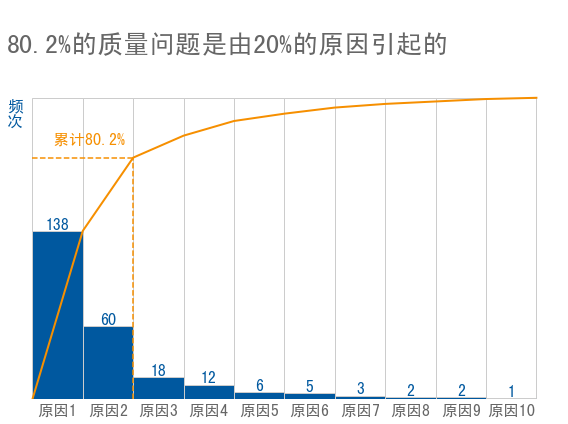

In [3]:
# 使用「面向对象」的方法画图
fig, ax = plt.subplots(figsize=(8, 6))

# 设置标题
ax.set_title('\n%.1f%%' % (y_cumsum[2]/y.sum()*100) + '的质量问题是由20%的原因引起的\n', 
             fontsize=26, loc='left', color=c['深灰色'])

# 用灰色方框代表总体的大小，体现每个数据的占比关系
ax.bar(x, y.sum(), width=1, color='w', edgecolor=c['浅灰色'], zorder=0)

# 画柱形图
ax.bar(x, y, width=1, color=c['蓝色'], edgecolor=c['浅灰色'], zorder=1)

# 画折线图
ax.plot(x2, y_cumsum, ls='-', lw=2, color=c['橙色'], label='累计百分比', zorder=2)

# 标记体现二八法则的虚线
ax.hlines(y_cumsum[2], -0.5, 1.5, color=c['橙色'], ls='--')
ax.vlines(1.5, 0, y_cumsum[2], color=c['橙色'], ls='--')

# 隐藏边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# 设置图形的位置，减少空白
ax.spines['left'].set_position(('data', -0.51))

# 隐藏 X 轴的刻度线
ax.tick_params(axis='x', which='major', length=0)
ax.tick_params(axis='y', which='major', length=0)
ax.set_yticklabels([])

# 设置坐标标签字体大小和颜色
ax.tick_params(labelsize=16, colors=c['深灰色'])

# 设置数据标签
for a, a2, b, b2, b3 in zip(x, x2[1:], y, y_cumsum[1:], y2):
    ax.text(a, b, '%.0f' % b, ha='center', va= 'bottom', fontsize=16, color=c['蓝色'])
    

# 标记 Y 轴标题
ax.text(-1, y.sum(), '频\n次', fontsize=16, va='top', color=c['蓝色'])

# 标记线条含义
ax.text(1.5, y_cumsum[2]+10, '累计%.1f%% ' % (y_cumsum[2]/y.sum()*100), fontsize=16, color=c['橙色'], va='bottom', ha='right', zorder=5)

plt.show()